In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import os
import cv2
import IPython.display as ipd
from IPython.display import clear_output
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_path="/content/drive/MyDrive/spectrograms/"

In [40]:
extracted_features =[]
for root, directories, files in os.walk(root_path):
    for file_name in files:
        if root is not root_path and file_name.endswith('.png'):
           data = cv2.imread(os.path.join(root,file_name), 0)
           resized_data = cv2.resize(data, (128,128))
           #NORMALIZATION
           resized_data=resized_data/255
           label=int(os.path.basename(os.path.normpath(root)))
           extracted_features.append([resized_data,label])

In [41]:
extracted_features_dataframe= pd.DataFrame(extracted_features, columns=["features", "class"])
extracted_features_dataframe.head()

,features,class
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6
1,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6
2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6
3,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6
4,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6


In [42]:
extracted_features_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  8732 non-null   object
 1   class     8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [43]:
extracted_features_dataframe["class"].value_counts()

5    1000
2    1000
3    1000
9    1000
0    1000
4    1000
7    1000
8     929
1     429
6     374
Name: class, dtype: int64

In [44]:
X=np.array(extracted_features_dataframe['features'].tolist())
Y=np.array(extracted_features_dataframe['class'].tolist())

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp= train_test_split(X,Y, test_size=0.2, random_state=0)

In [46]:
x_test, x_val, y_test, y_val=train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

MODEL CREATING

In [47]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
model=tf.keras.Sequential()

In [49]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [50]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [52]:
results=model.fit(x_train,y_train,
                  batch_size=128,
                  epochs=50,
                  validation_data=(x_val,y_val))

Epoch 1/50
55/55 [==============================] - 16s 79ms/step - loss: 1.4734 - accuracy: 0.4750 - val_loss: 1.0318 - val_accuracy: 0.6693
Epoch 2/50
55/55 [==============================] - 3s 60ms/step - loss: 0.8484 - accuracy: 0.7198 - val_loss: 0.7353 - val_accuracy: 0.7860
Epoch 3/50
55/55 [==============================] - 3s 60ms/step - loss: 0.6142 - accuracy: 0.8149 - val_loss: 0.6165 - val_accuracy: 0.8124
Epoch 4/50
55/55 [==============================] - 3s 60ms/step - loss: 0.4389 - accuracy: 0.8633 - val_loss: 0.5933 - val_accuracy: 0.8318
Epoch 5/50
55/55 [==============================] - 3s 60ms/step - loss: 0.3002 - accuracy: 0.9078 - val_loss: 0.4840 - val_accuracy: 0.8604
Epoch 6/50
55/55 [==============================] - 3s 60ms/step - loss: 0.1953 - accuracy: 0.9414 - val_loss: 0.5893 - val_accuracy: 0.8524
Epoch 7/50
55/55 [==============================] - 3s 60ms/step - loss: 0.1277 - accuracy: 0.9625 - val_loss: 0.5670 - val_accuracy: 0.8741
Epoch 8/50
5

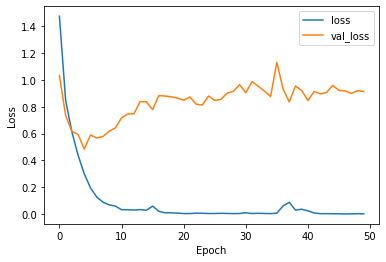

In [53]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

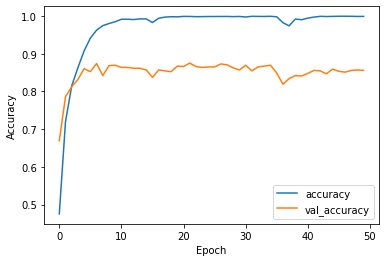

In [54]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
model.evaluate(x_test,y_test)

28/28 [==============================] - 1s 12ms/step - loss: 0.8323 - accuracy: 0.8603


[0.8322645425796509, 0.8602520227432251]

In [56]:
# Make prediction on the reshaped sample
prediction_result=model.predict(x_test[789].reshape(1,128,128,1))

# Print the prediction result
print(prediction_result)

[[9.9998116e-01 1.0754795e-13 2.5540483e-11 1.6457048e-12 1.0305884e-09
  7.6521825e-18 6.2632657e-15 7.0316625e-10 2.4495239e-07 1.8640274e-05]]


In [57]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability=prediction_result.max()

In [60]:
# Print the results
print("Image Class: ", y_test[789],"Predicted Class: ", predicted_class, "with the", predicted_probability, "% probability")

Image Class:  0 Predicted Class:  0 with the 0.99998116 % probability
